In [12]:
#import lib

import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression 

In [2]:
df = pd.read_csv('data/MNISTonly0_1.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
#visualize each digit

pixel_colnames = df.columns[:-1]


In [4]:
image_values = df.loc[0, pixel_colnames].values

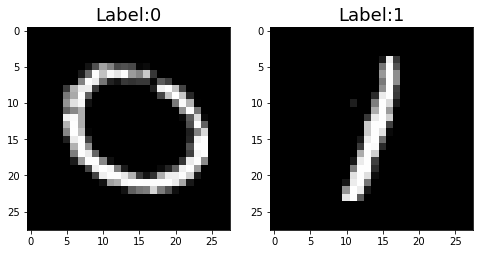

In [5]:
plt.figure(figsize = (8,4))
for index in range(0, 2):
    plt.subplot(1,2,1+index)
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(28,28), cmap = 'gray')
    plt.title('Label:' + str(image_label), fontsize = 18)
    

In [6]:
#split data in to train test set

x_train , x_test,  y_train, y_test = train_test_split(df[pixel_colnames], df['label'], random_state = 0)

In [7]:
#standardize data

scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
scaledTrainImages = x_train.copy()

In [9]:
#PCA logistic Regression

pca = PCA(n_components = 0.90)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

print('Number of dimensions before PCA: '+str(len(pixel_colnames)))
print('Number of dimensions before PCA: '+str(pca.n_components_))
print('Classification accuracy: '+str(clf.score(x_test, y_test)))

Number of dimensions before PCA: 784
Number of dimensions before PCA: 104
Classification accuracy: 0.997


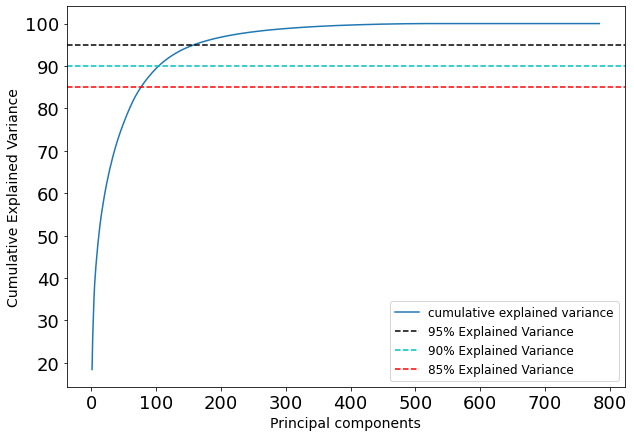

In [14]:
#relationship b/w Comulative Explained Variance

pca = PCA()

pca.fit(scaledTrainImages)

tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

fig,ax = plt.subplots(nrows = 1, ncols =1, figsize = (10,7))
ax.tick_params(labelsize =18)
ax.plot(range(1, 785), cum_var_exp, label = 'cumulative explained variance')
ax.set_ylabel('Cumulative Explained Variance', fontsize = 14)
ax.set_xlabel('Principal components', fontsize = 14)
ax.axhline(y=95, color ='k', linestyle='--', label= '95% Explained Variance')
ax.axhline(y=90, color ='c', linestyle='--', label= '90% Explained Variance')
ax.axhline(y=85, color ='r', linestyle='--', label= '85% Explained Variance')
ax.legend(loc = 'best', markerscale = 1.0, fontsize = 12)